# 时频图

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ysy_plot_utils as ypu
import ysy_gw_data_utils as ygdu
from gwpy.timeseries import TimeSeries
import json

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

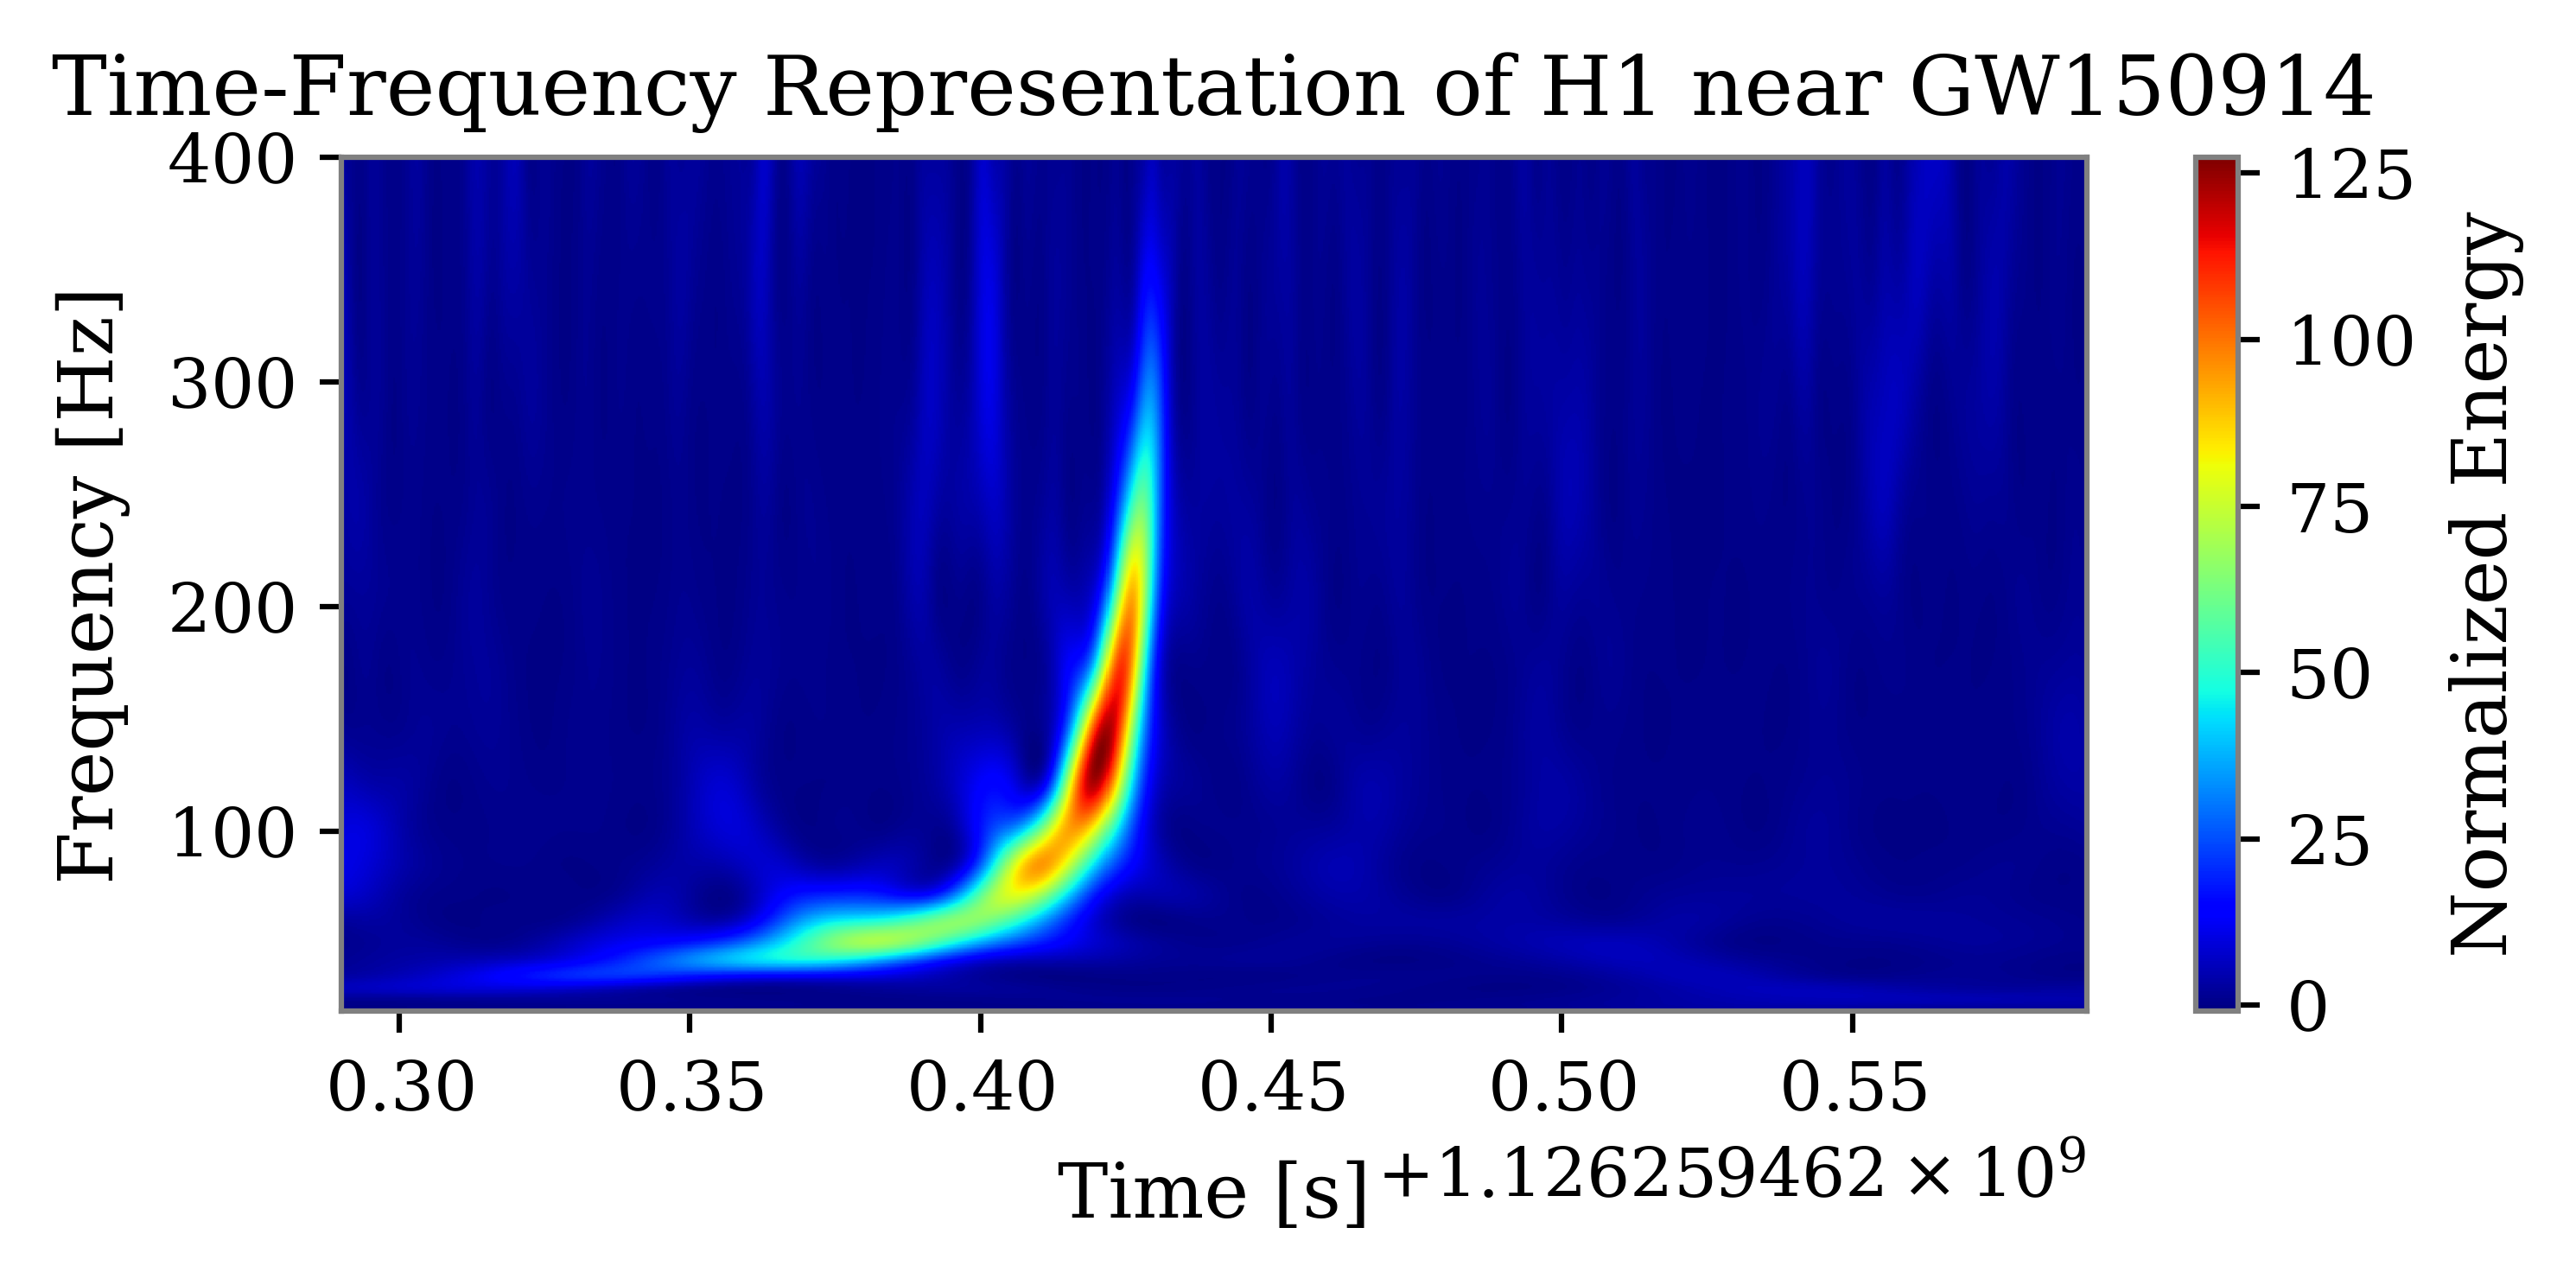

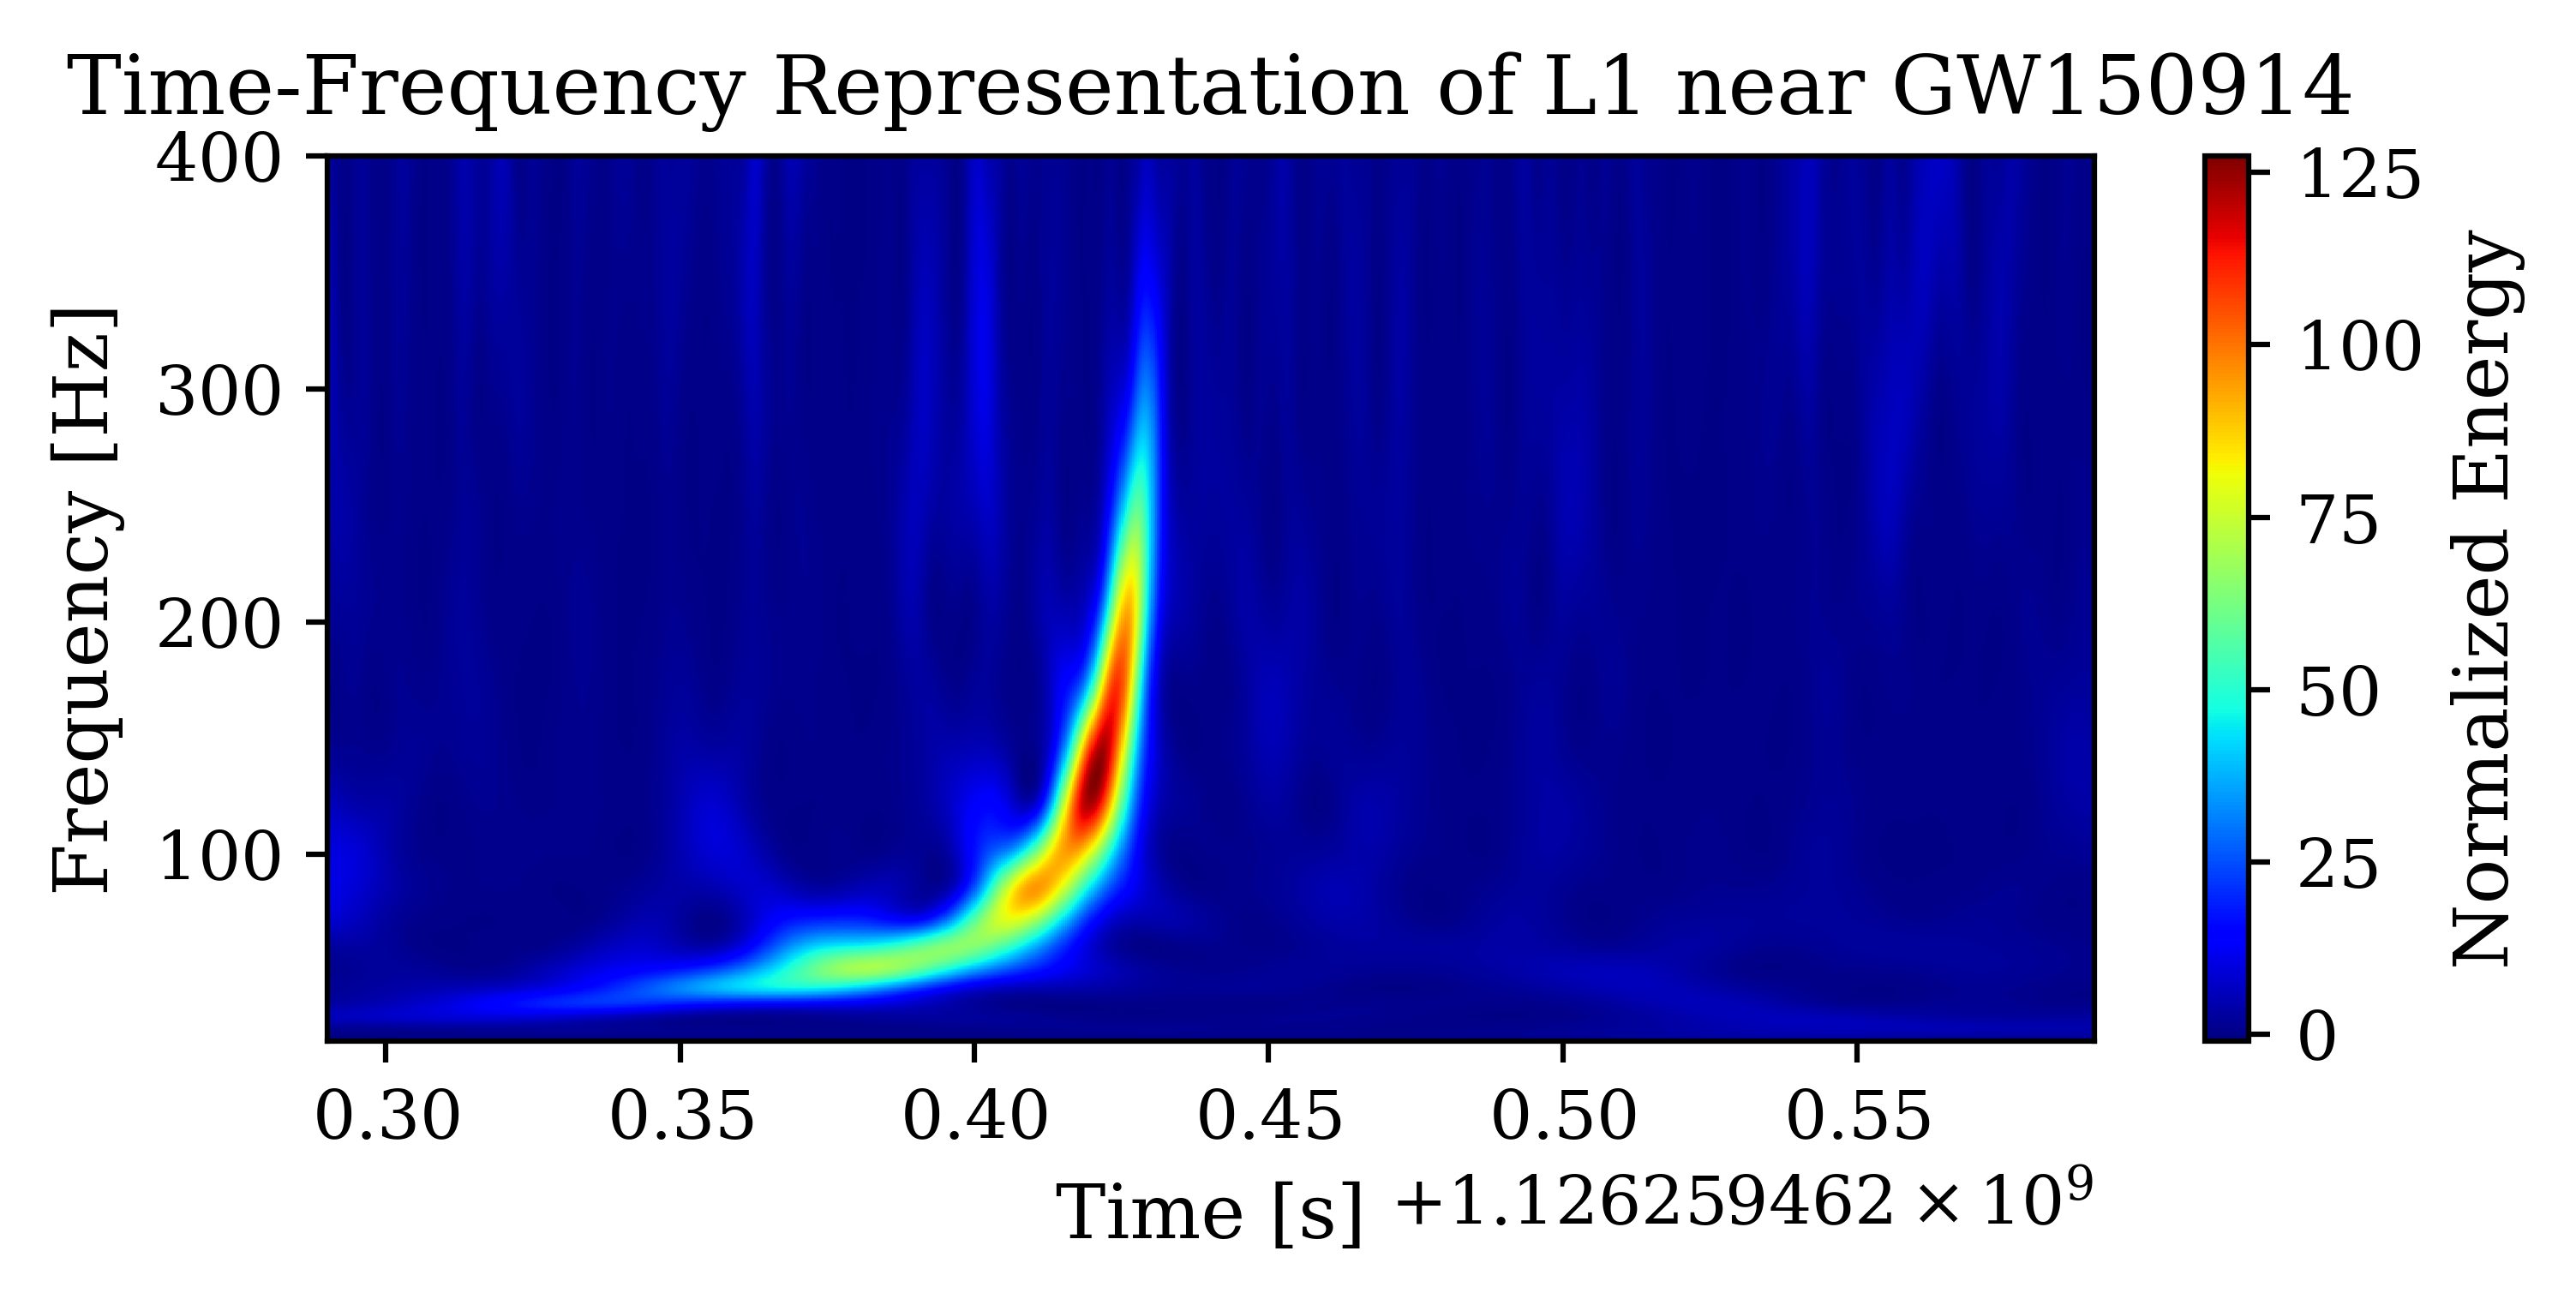

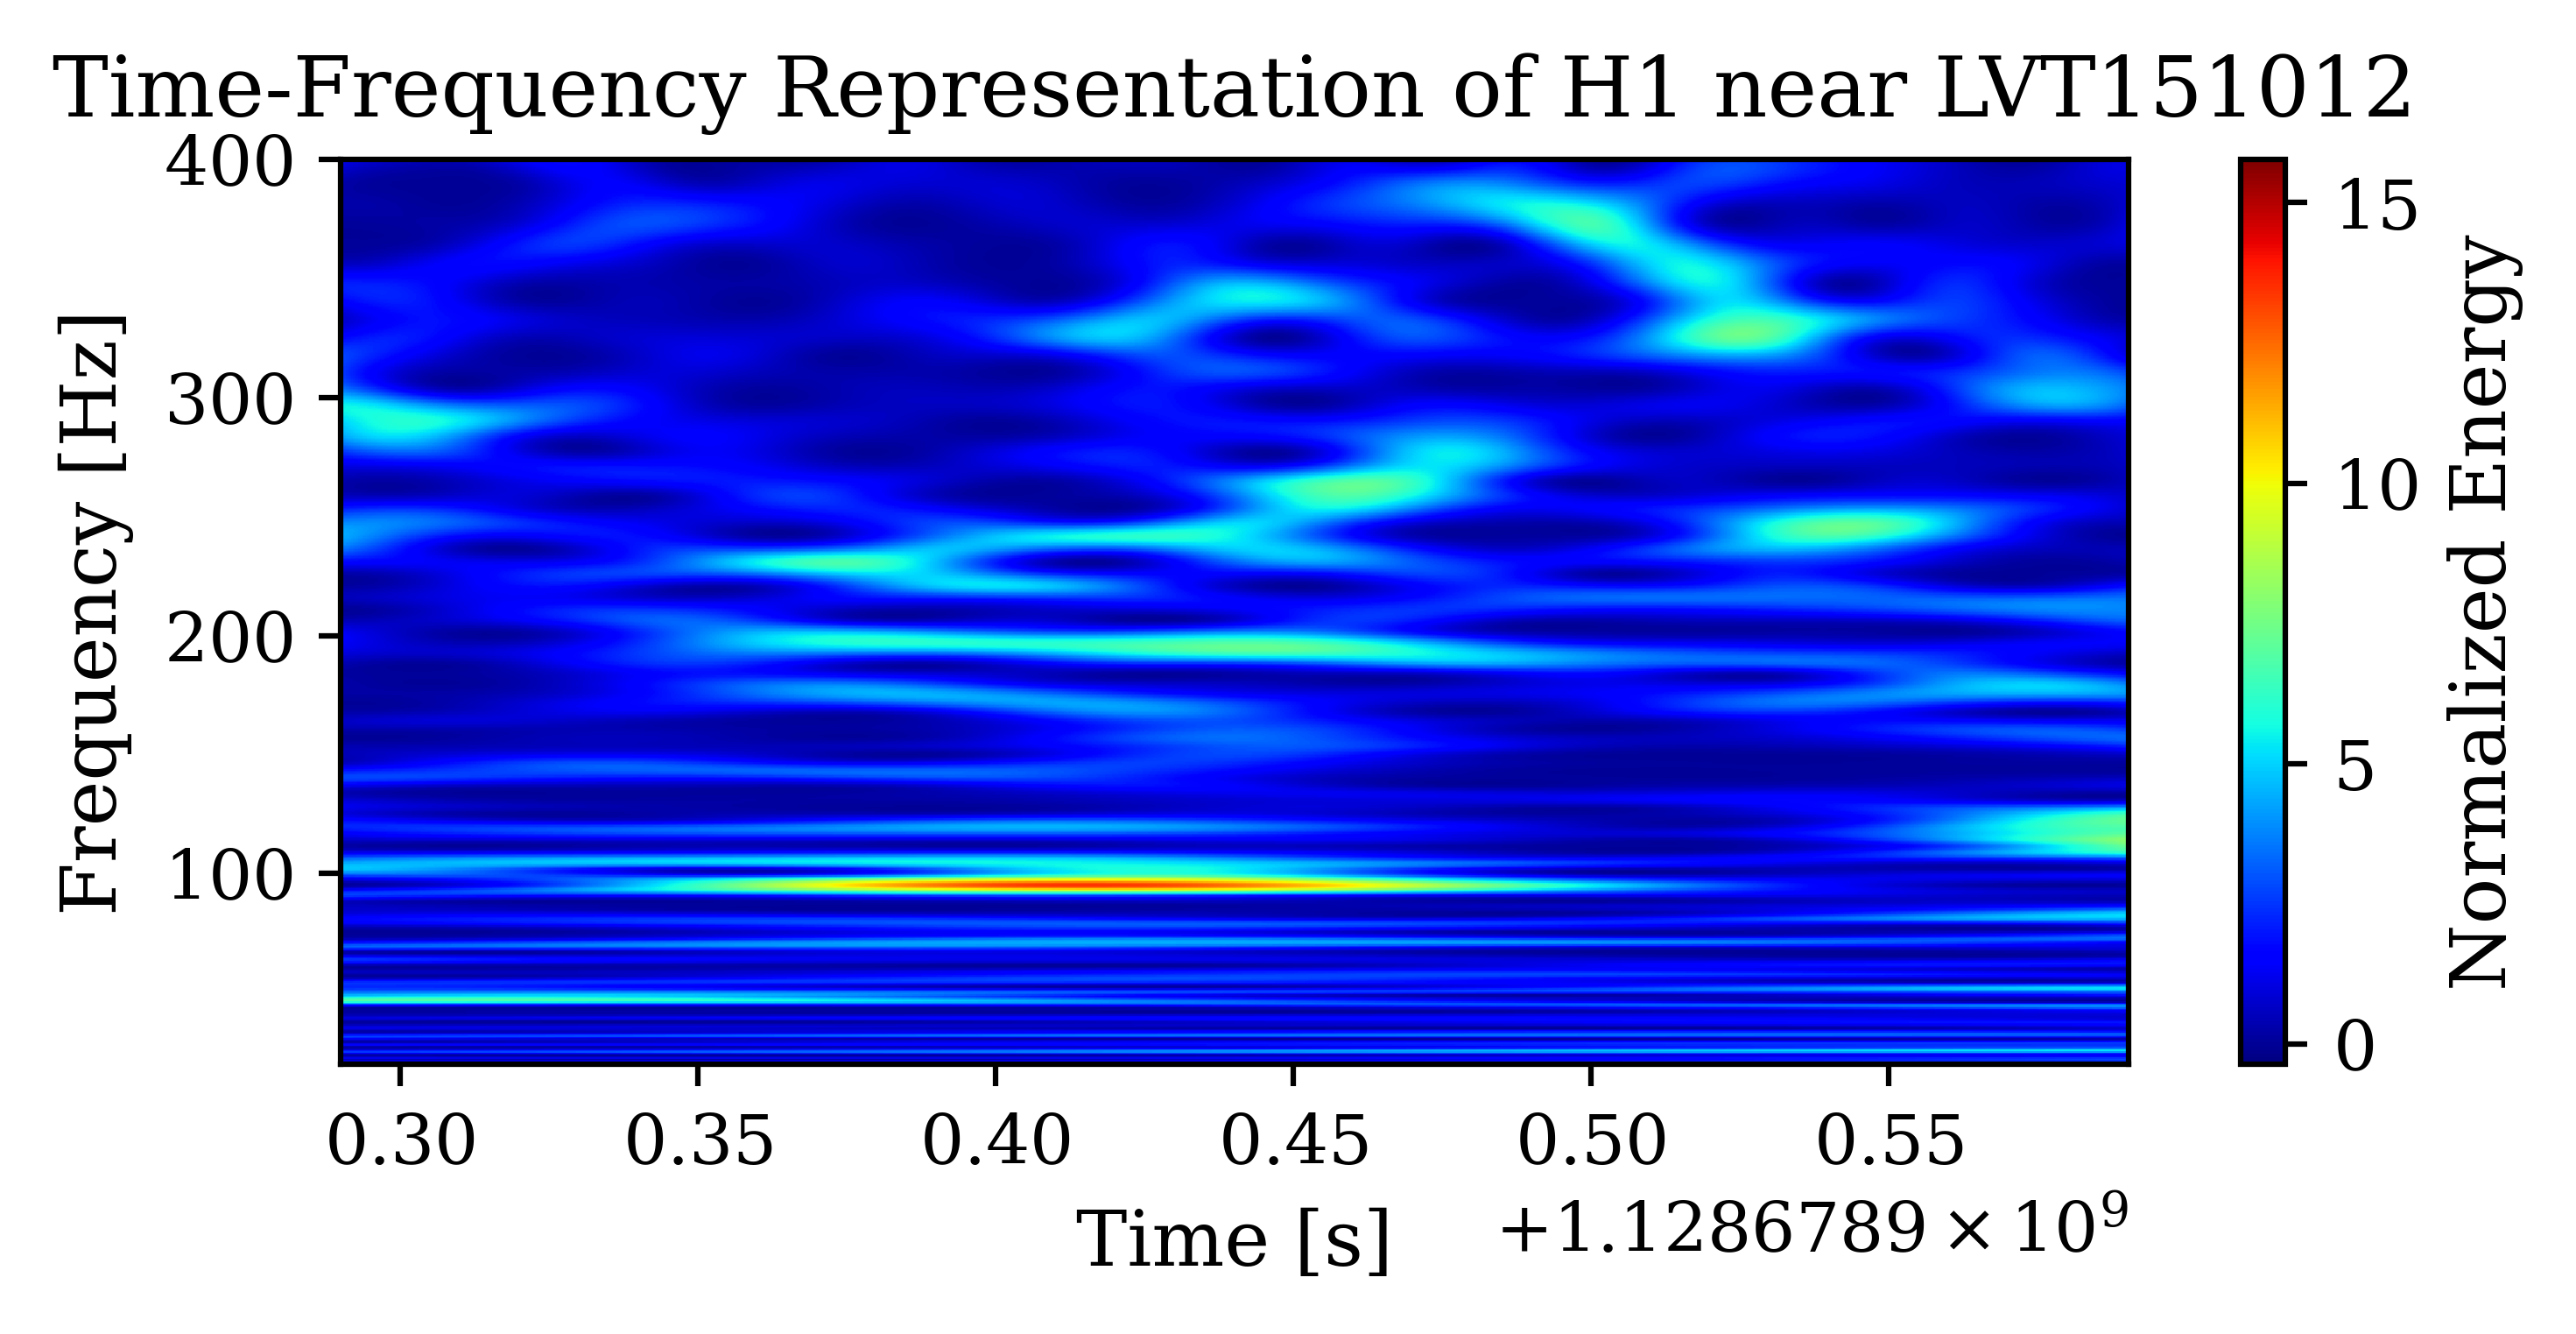

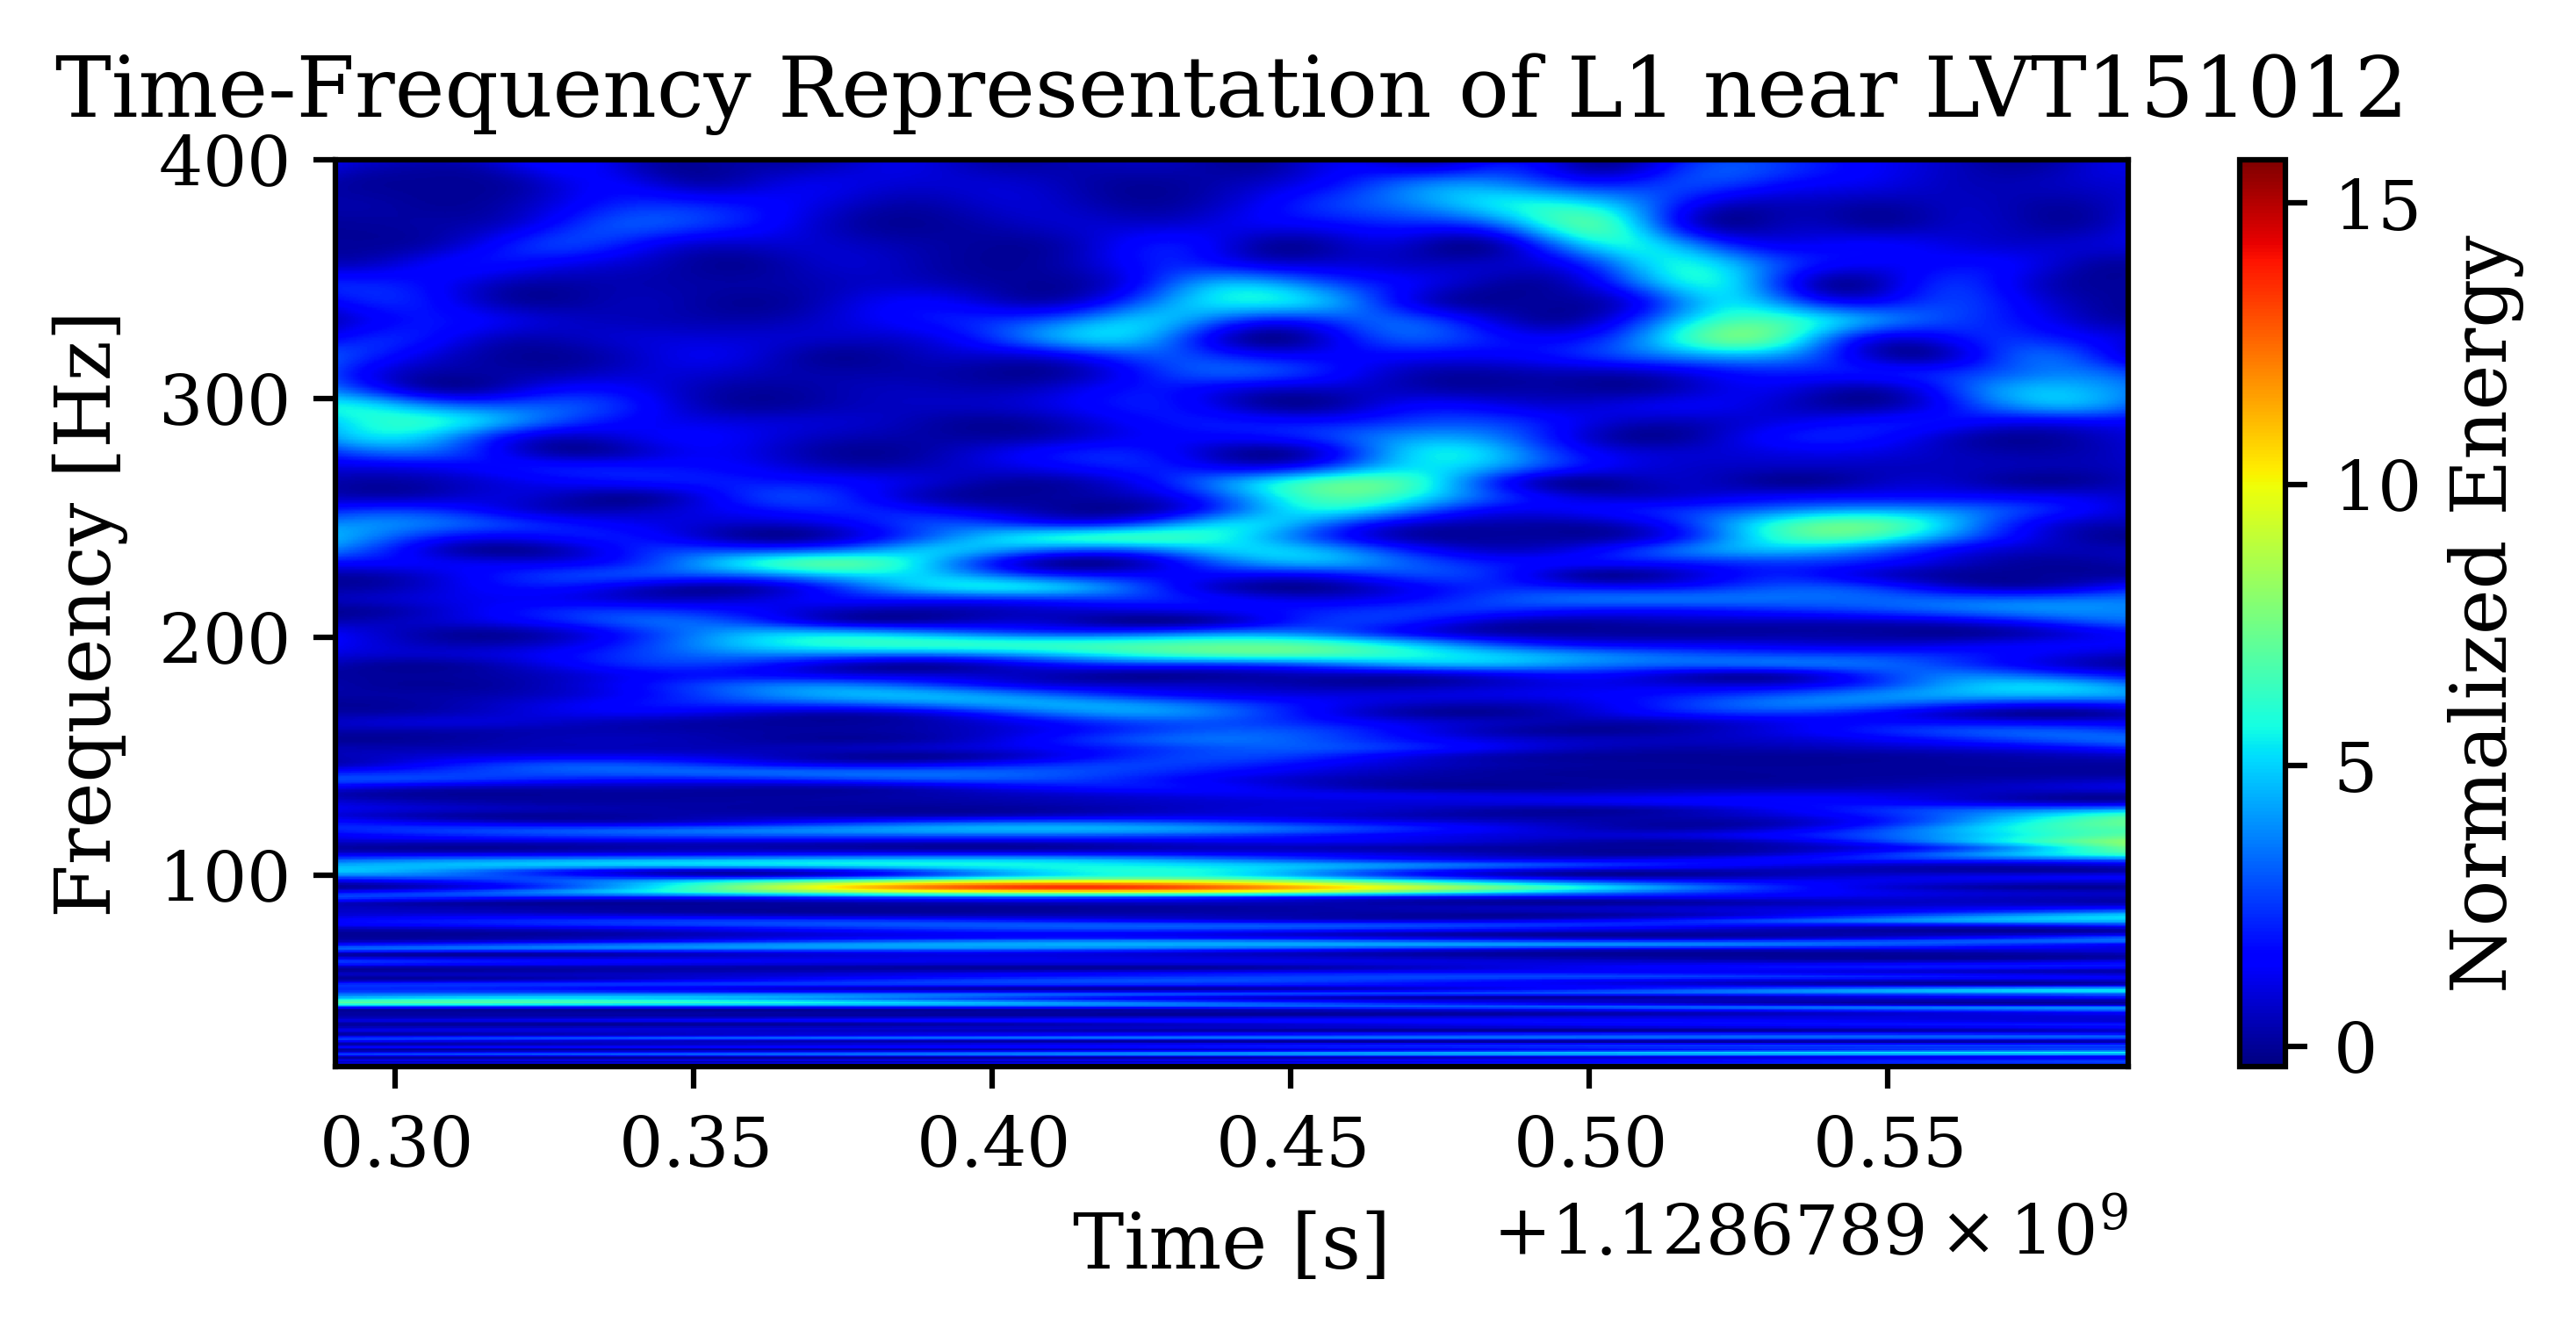

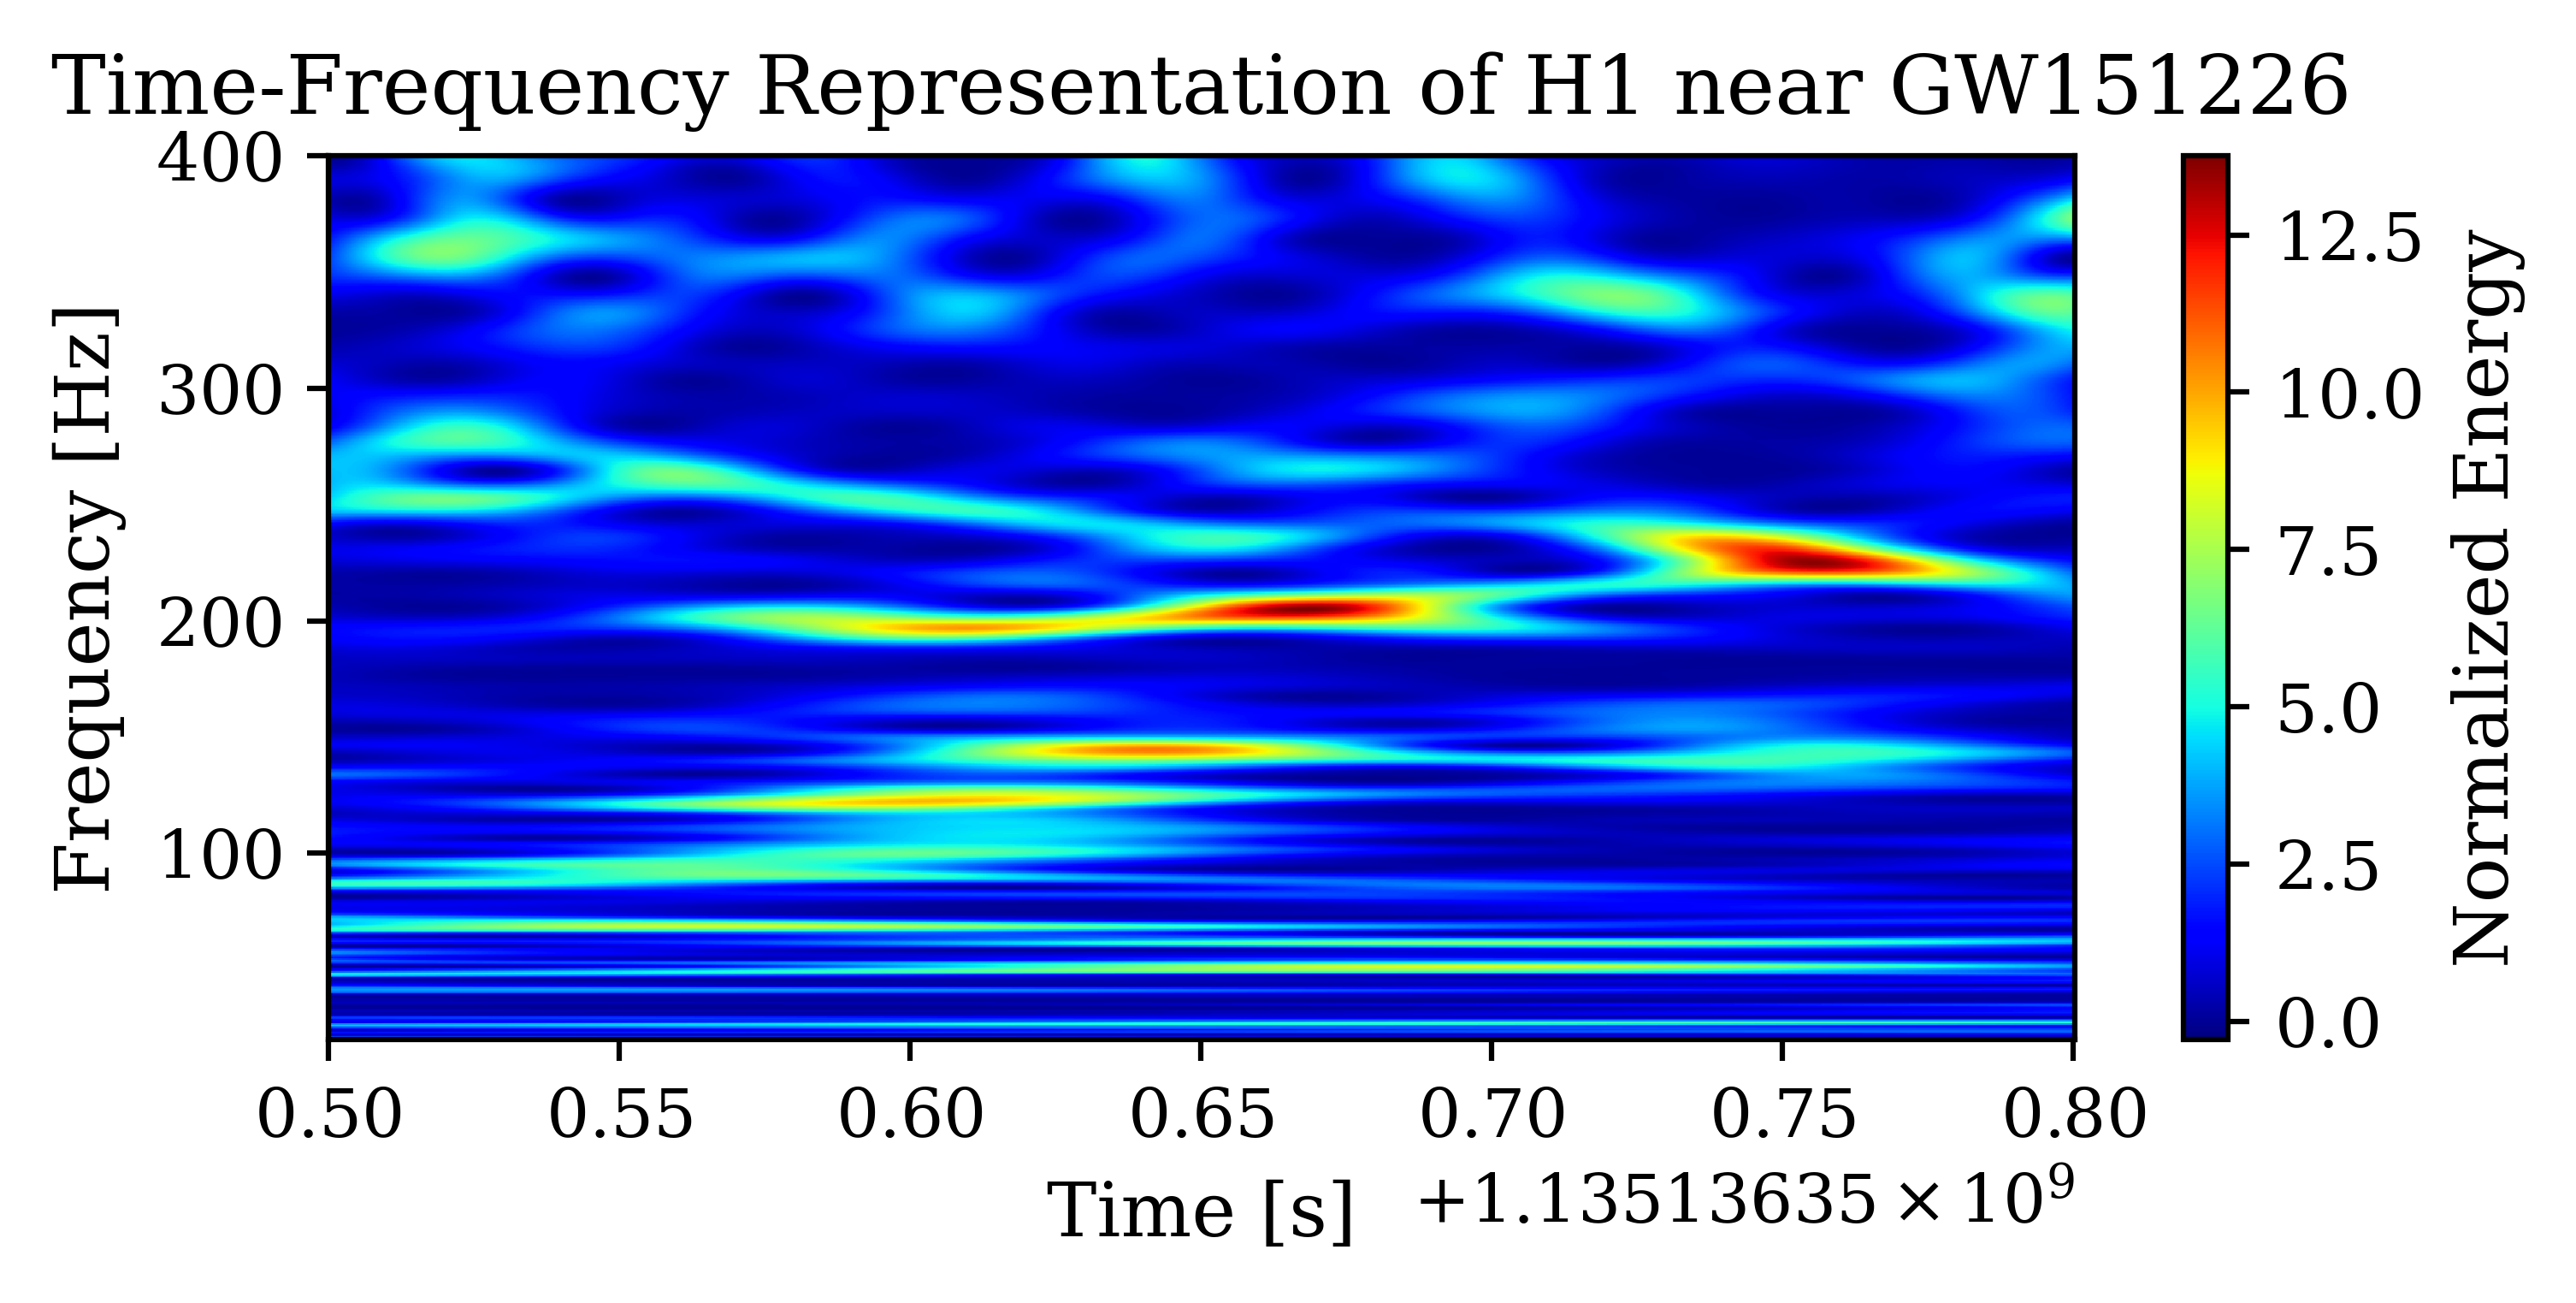

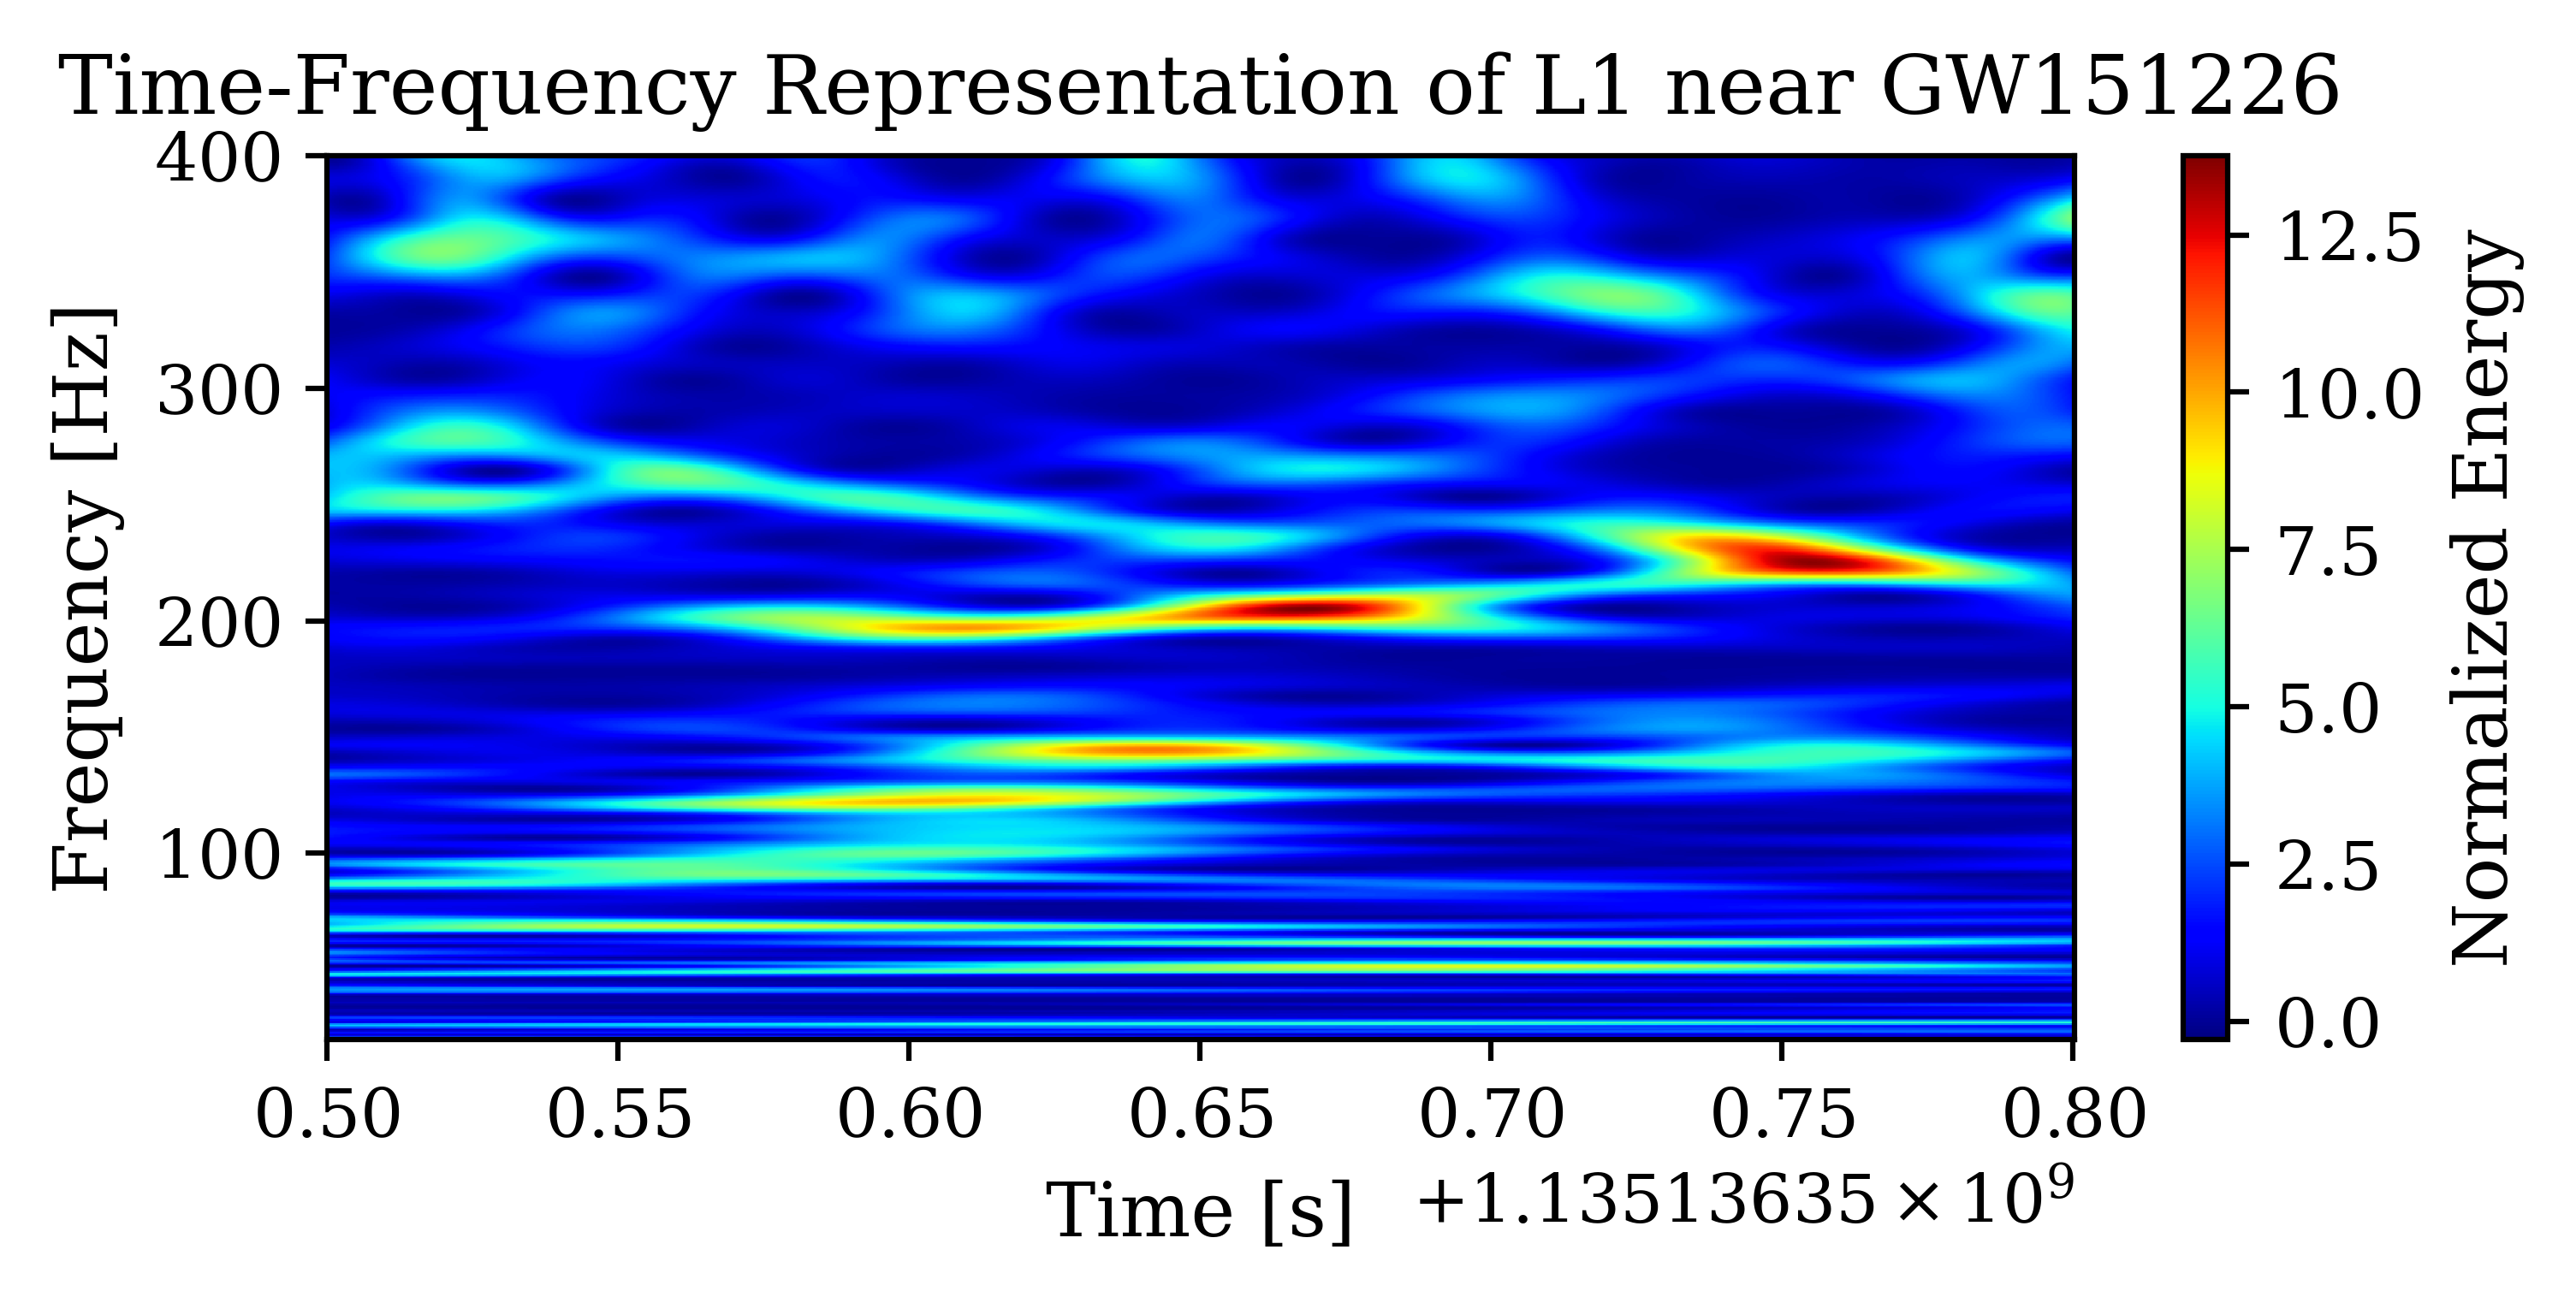

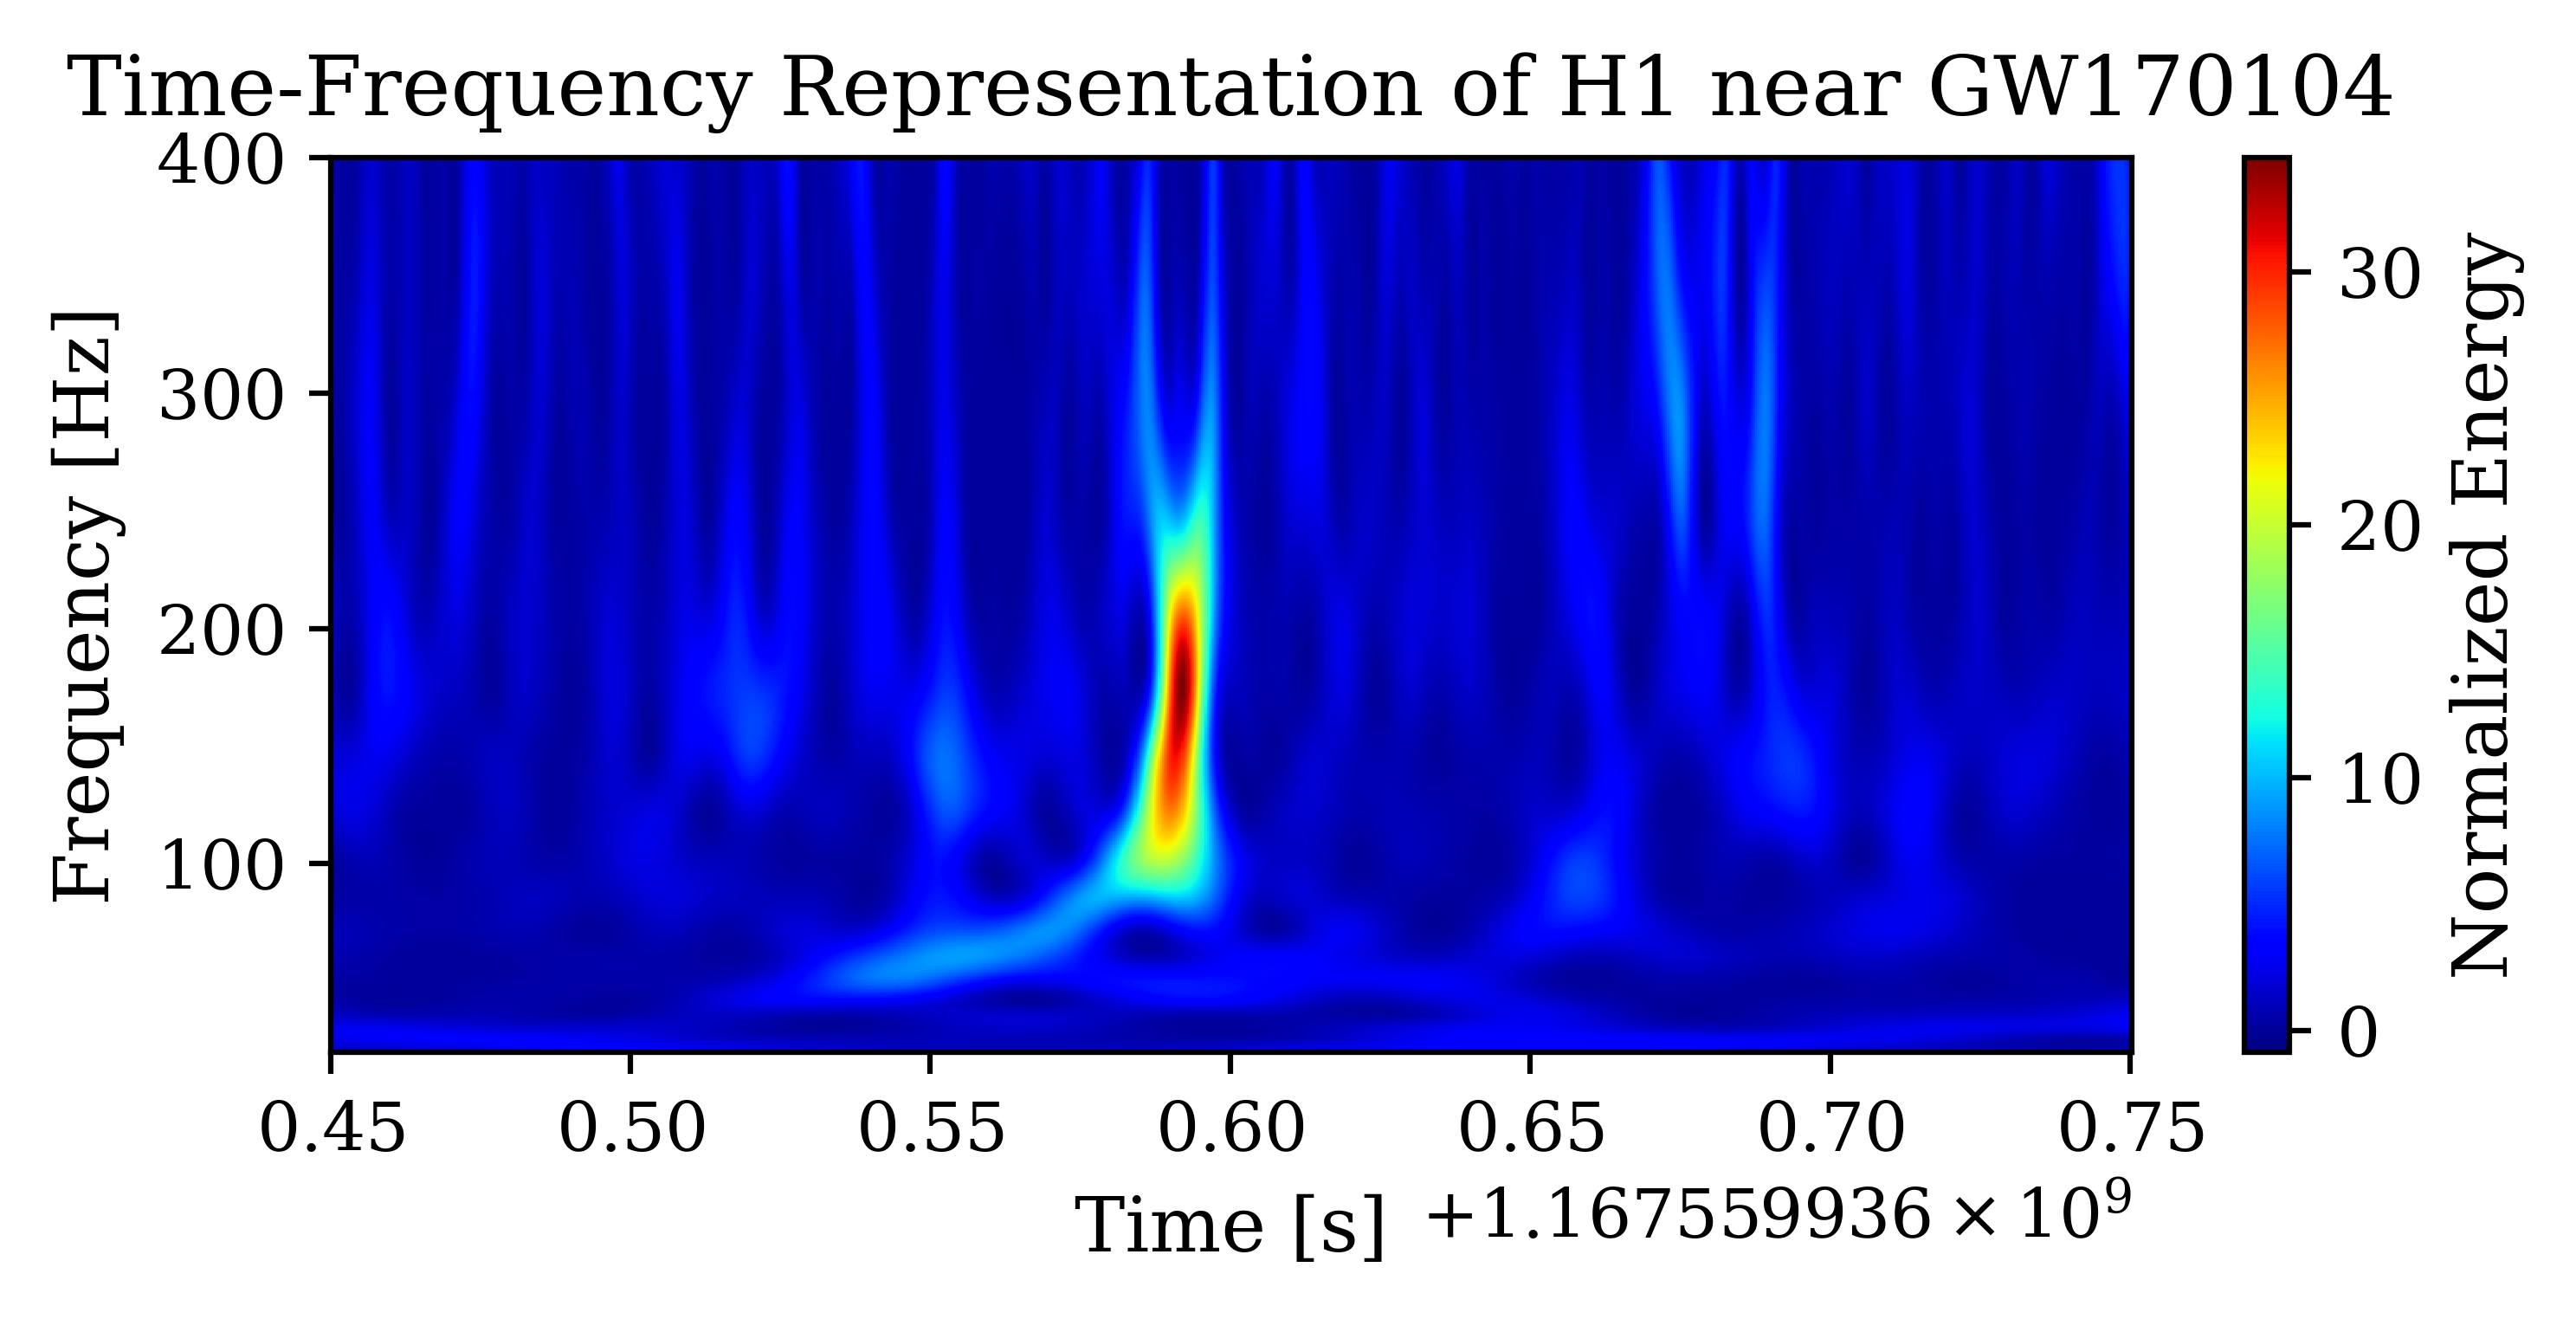

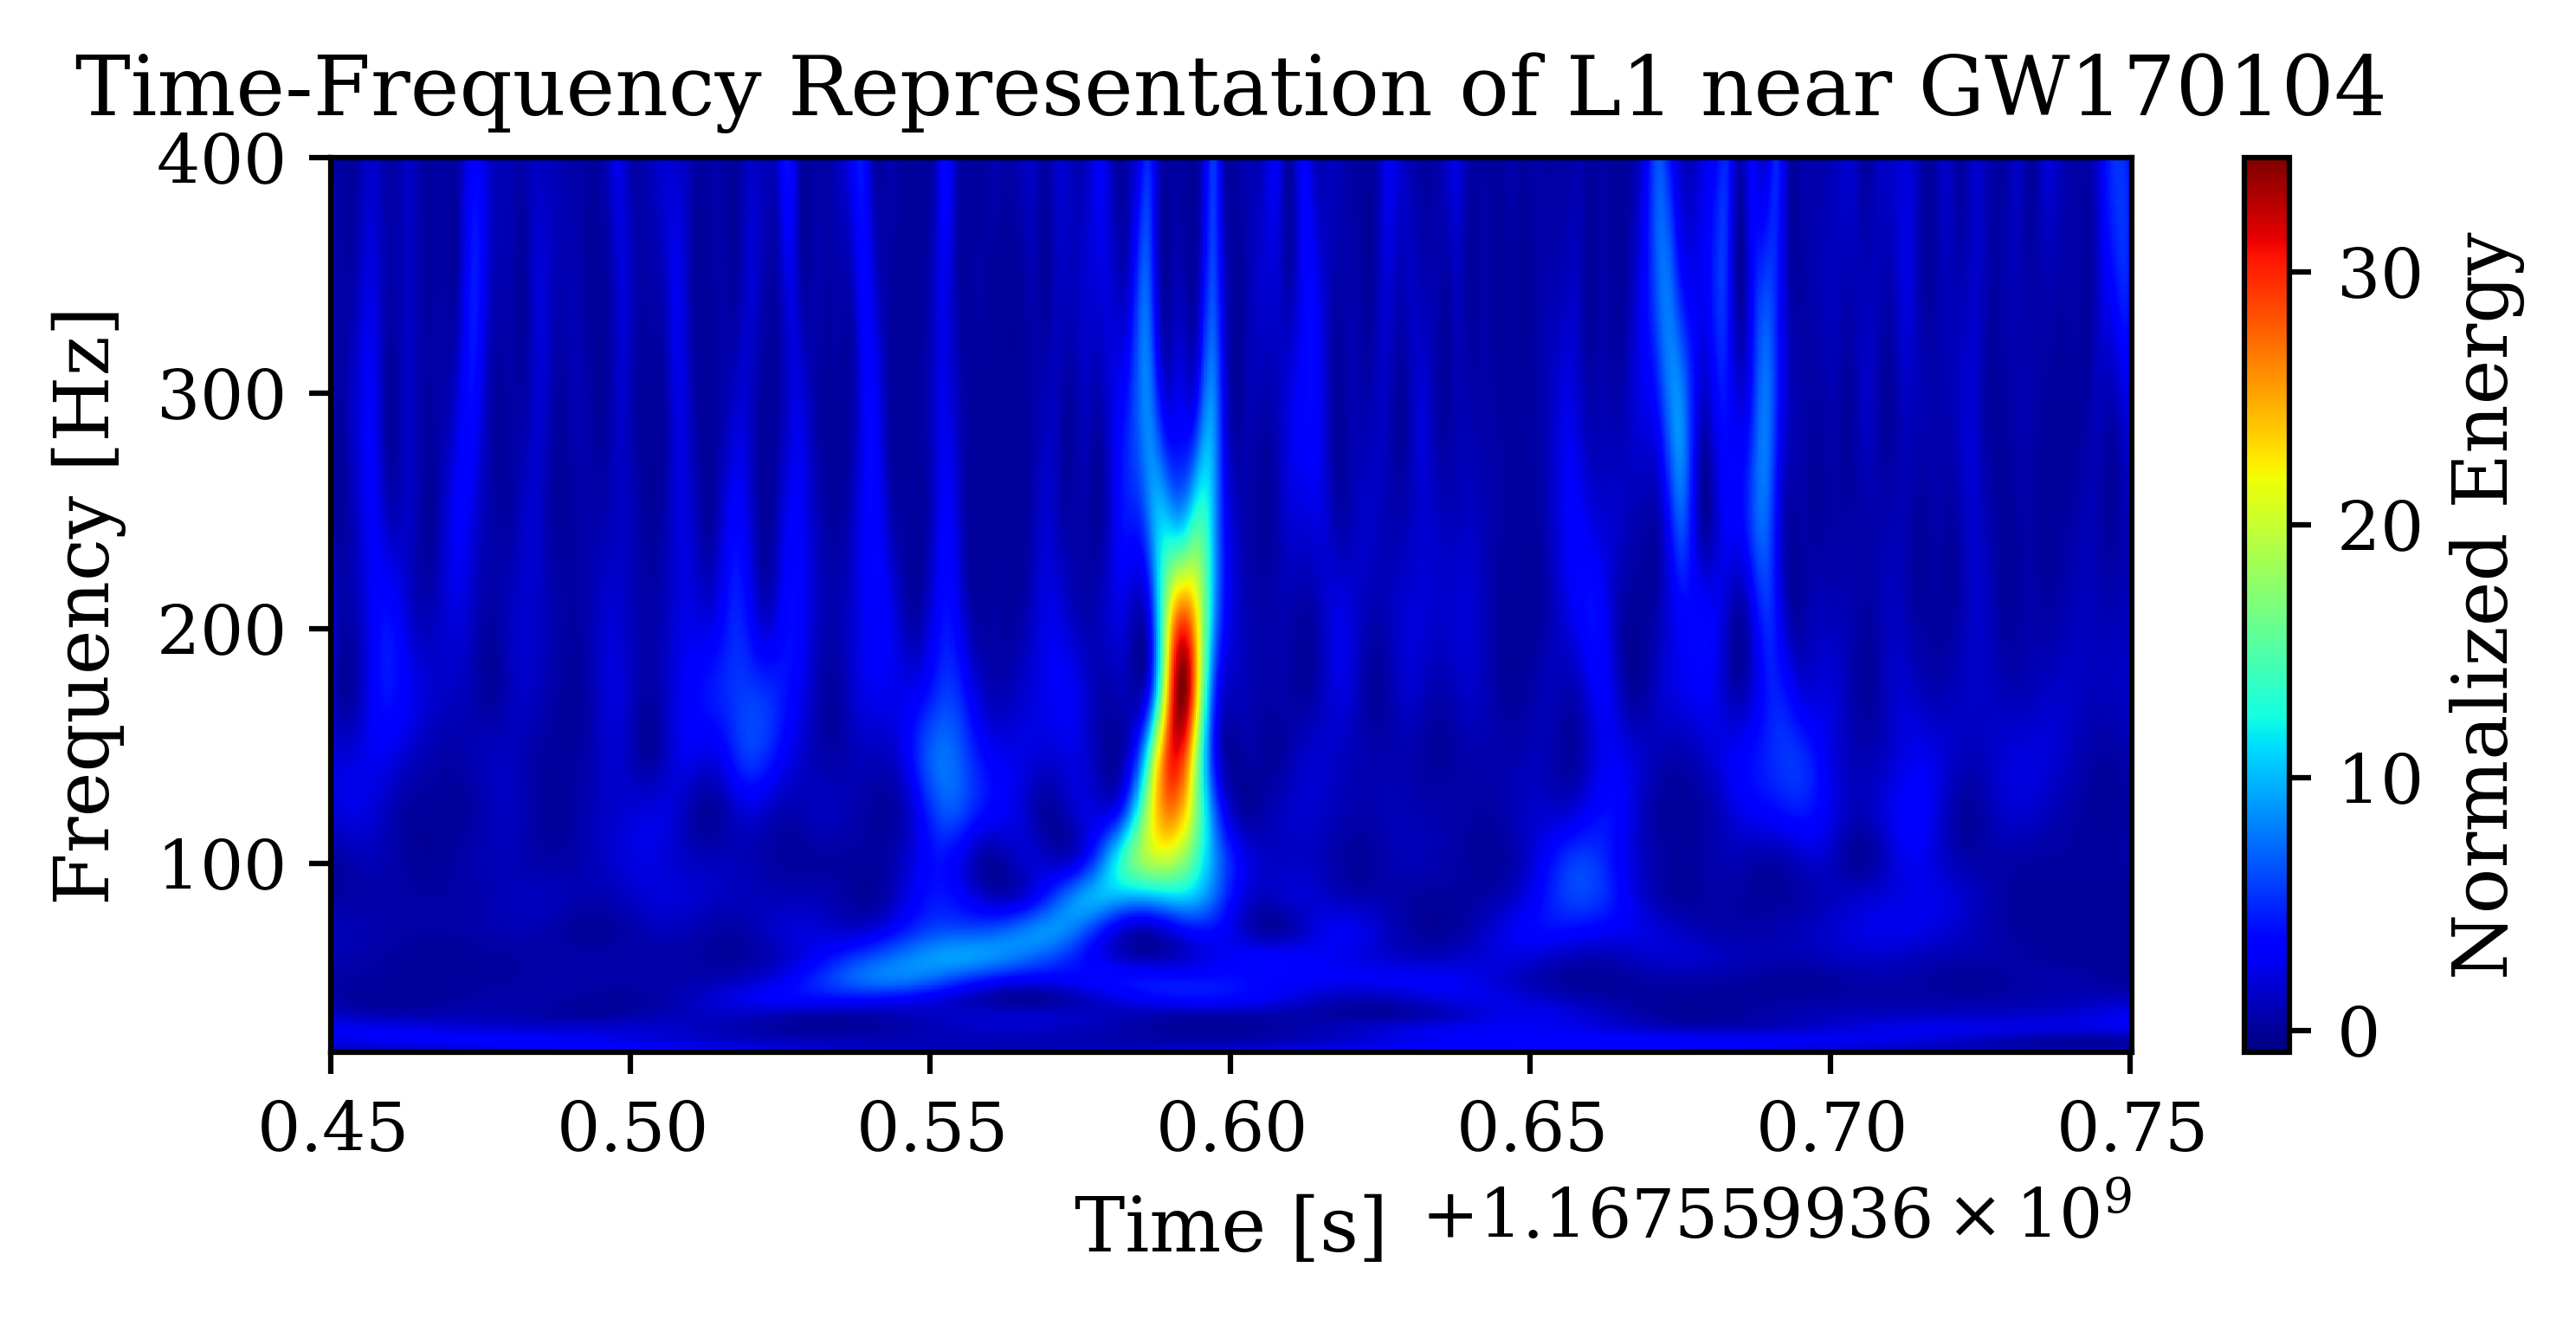

In [2]:
json_file_path = 'BBH_events_v3.json'
with open(json_file_path, 'r') as f:
    all_events_data = json.load(f)
    
# 遍历JSON文件中的每一个事件并进行处理
for event_name, event_info in all_events_data.items():
    # 确保 'name' 键存在，如果不存在则使用字典的键
    if 'name' not in event_info:
        event_info['name'] = event_name

    delta = 0.15
    t_event = event_info['tevent']
    H1 = TimeSeries.read(event_info['fn_H1'], format='hdf5.gwosc')
    L1 = TimeSeries.read(event_info['fn_L1'], format='hdf5.gwosc')

    qspecgram_H1 = H1.q_transform(outseg=(t_event-delta, t_event+delta))
    qspecgram_L1 = H1.q_transform(outseg=(t_event-delta, t_event+delta))

    with ypu.temp_style(["ysy_academic", "science_color"]):
        plt.figure(figsize=(4.7*1.1, 2.9/1.1))
        plt.pcolormesh(qspecgram_H1, cmap='jet')
        plt.colorbar(label='Normalized Energy')
        plt.xlabel('Time [s]')
        plt.ylabel('Frequency [Hz]')
        plt.ylabel('Frequency [Hz]')
        plt.title('Time-Frequency Representation of H1 near '+event_name)
        plt.ylim(20, 400)
        plt.tight_layout()
        plt.show()

    with ypu.temp_style(["ysy_academic", "science_color"]):
        plt.figure(figsize=(4.7*1.1, 2.9/1.1))
        plt.pcolormesh(qspecgram_L1, cmap='jet')
        plt.colorbar(label='Normalized Energy')
        plt.xlabel('Time [s]')
        plt.ylabel('Frequency [Hz]')
        plt.ylabel('Frequency [Hz]')
        plt.title('Time-Frequency Representation of L1 near '+event_name)
        plt.ylim(20, 400)
        plt.tight_layout()
        plt.show()